In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df =pd.read_csv('D:/datacsv/data.csv')

In [3]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [4]:
df.drop(['day','month','year','countryterritoryCode'],axis=1,inplace=True)

In [5]:
df

,dateRep,cases,deaths,countriesAndTerritories,geoId,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,746,6,Afghanistan,AF,38041757.0,Asia,9.013779
1,13/12/2020,298,9,Afghanistan,AF,38041757.0,Asia,7.052776
2,12/12/2020,113,11,Afghanistan,AF,38041757.0,Asia,6.868768
3,11/12/2020,63,10,Afghanistan,AF,38041757.0,Asia,7.134266
4,10/12/2020,202,16,Afghanistan,AF,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...
61895,25/03/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,ZW,14645473.0,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,ZW,14645473.0,Africa,NaN


In [6]:
df.rename(columns={'countriesAndTerritories':'country','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'covid-19_cases_per_100000'}, inplace=True)

In [7]:
df

,dateRep,cases,deaths,country,geoId,popData2019,continentExp,covid-19_cases_per_100000
0,14/12/2020,746,6,Afghanistan,AF,38041757.0,Asia,9.013779
1,13/12/2020,298,9,Afghanistan,AF,38041757.0,Asia,7.052776
2,12/12/2020,113,11,Afghanistan,AF,38041757.0,Asia,6.868768
3,11/12/2020,63,10,Afghanistan,AF,38041757.0,Asia,7.134266
4,10/12/2020,202,16,Afghanistan,AF,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...
61895,25/03/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61896,24/03/2020,0,1,Zimbabwe,ZW,14645473.0,Africa,NaN
61897,23/03/2020,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61898,22/03/2020,1,0,Zimbabwe,ZW,14645473.0,Africa,NaN


In [8]:
df['dateRep'] = pd.to_datetime(df['dateRep'])

In [9]:
df

,dateRep,cases,deaths,country,geoId,popData2019,continentExp,covid-19_cases_per_100000
0,2020-12-14,746,6,Afghanistan,AF,38041757.0,Asia,9.013779
1,2020-12-13,298,9,Afghanistan,AF,38041757.0,Asia,7.052776
2,2020-12-12,113,11,Afghanistan,AF,38041757.0,Asia,6.868768
3,2020-11-12,63,10,Afghanistan,AF,38041757.0,Asia,7.134266
4,2020-10-12,202,16,Afghanistan,AF,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...
61895,2020-03-25,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61896,2020-03-24,0,1,Zimbabwe,ZW,14645473.0,Africa,NaN
61897,2020-03-23,0,0,Zimbabwe,ZW,14645473.0,Africa,NaN
61898,2020-03-22,1,0,Zimbabwe,ZW,14645473.0,Africa,NaN


In [10]:
# imputer = SimpleImputer(strategy='constant')
# df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [11]:
df2 = df.groupby(['country','dateRep'])[['country','dateRep','cases','deaths']].sum().reset_index()

In [13]:
df2

,country,dateRep,cases,deaths
0,Afghanistan,2019-12-31,0,0
1,Afghanistan,2020-01-01,0,0
2,Afghanistan,2020-01-02,0,0
3,Afghanistan,2020-01-03,0,0
4,Afghanistan,2020-01-04,25,0
...,...,...,...,...
61895,Zimbabwe,2020-12-10,1,0
61896,Zimbabwe,2020-12-11,57,0
61897,Zimbabwe,2020-12-12,81,1
61898,Zimbabwe,2020-12-13,57,1


In [15]:
countries = df2['country'].unique()
len(countries)

214

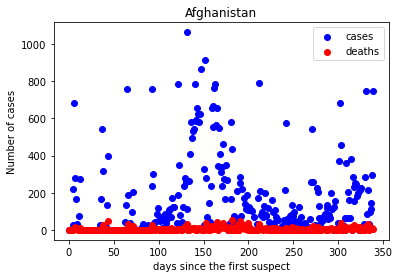

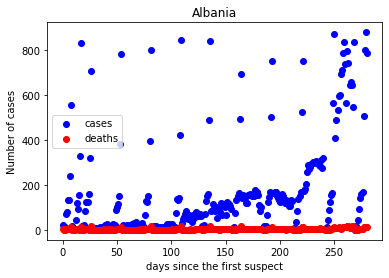

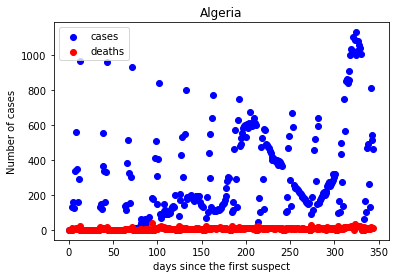

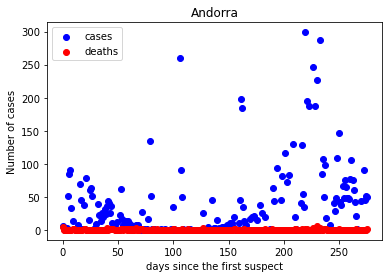

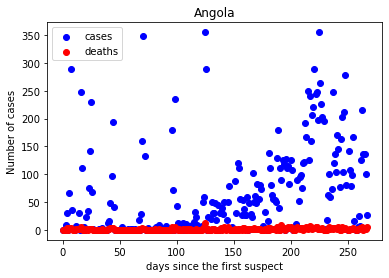

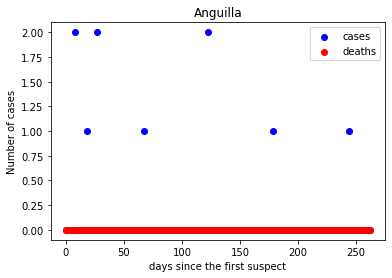

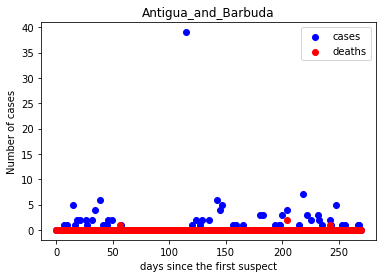

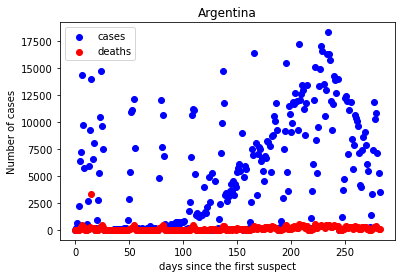

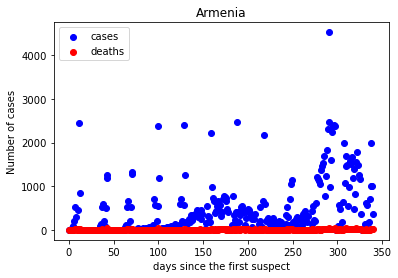

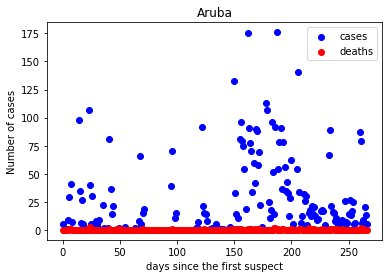

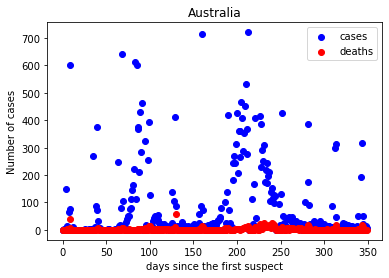

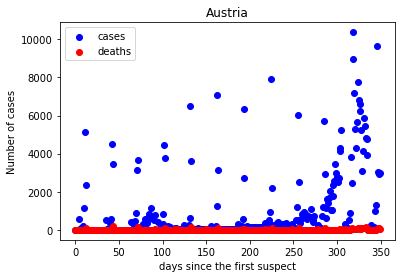

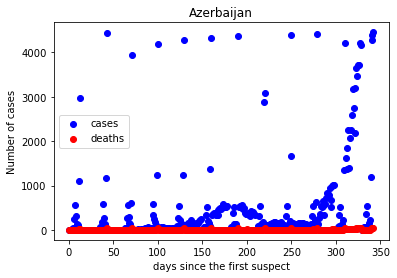

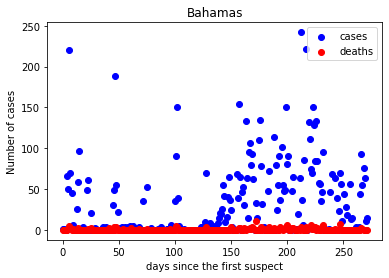

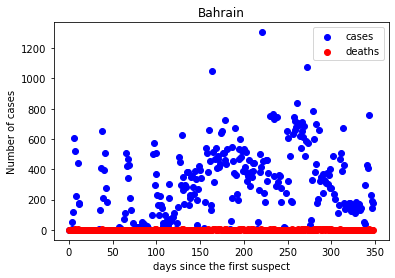

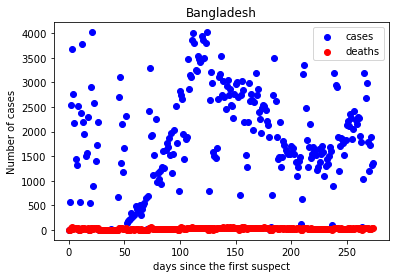

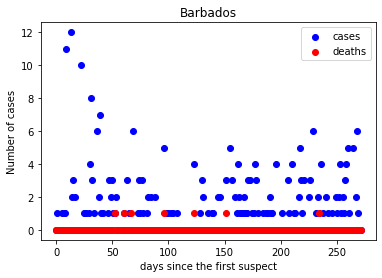

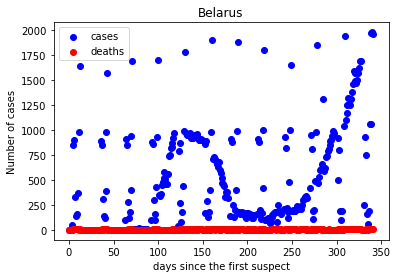

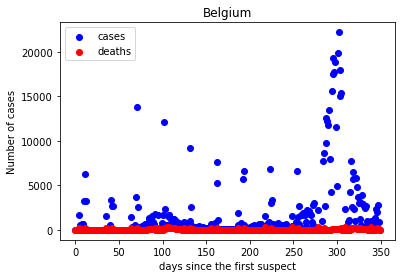

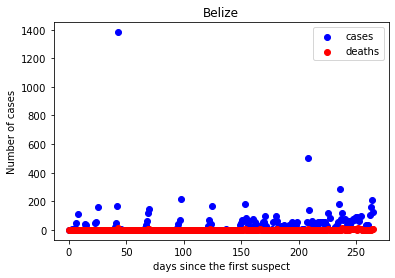

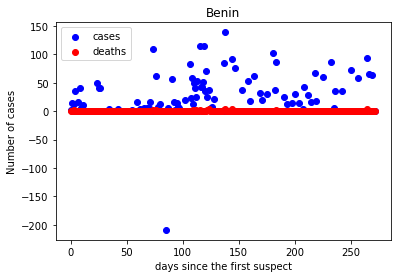

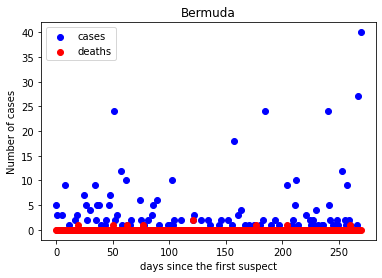

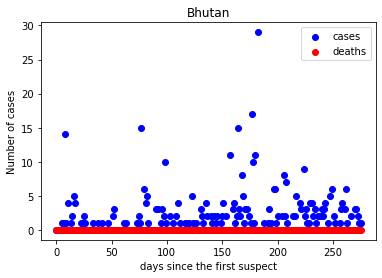

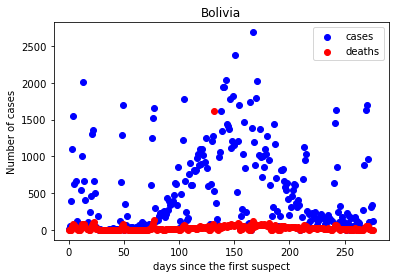

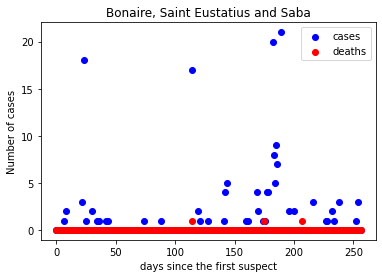

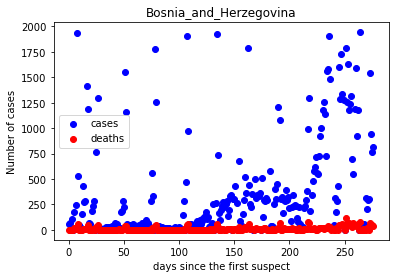

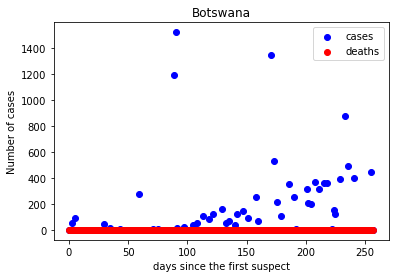

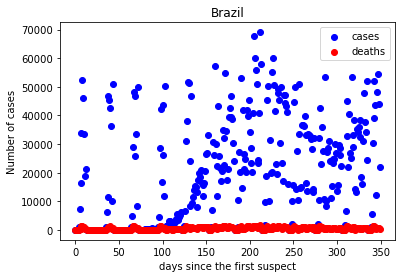

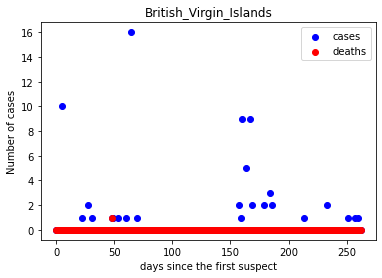

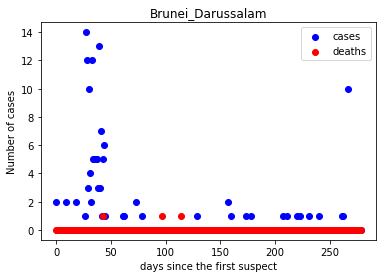

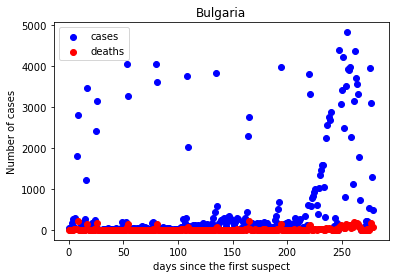

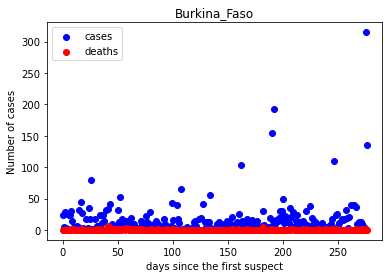

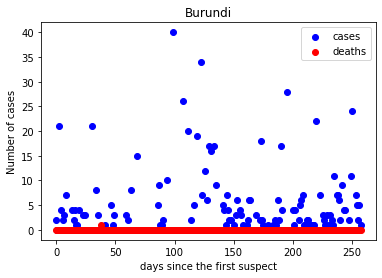

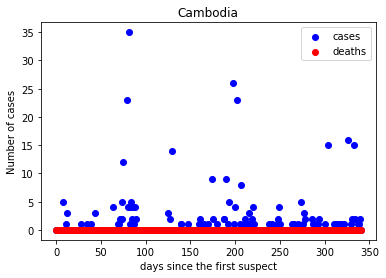

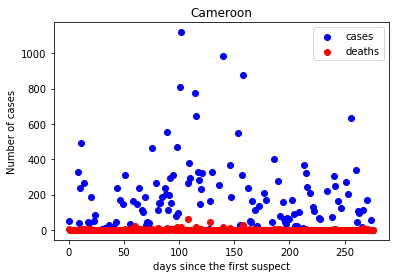

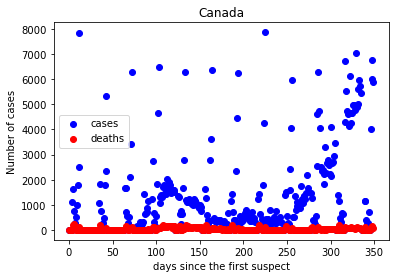

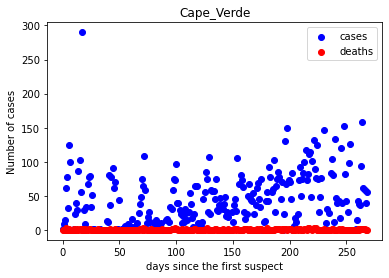

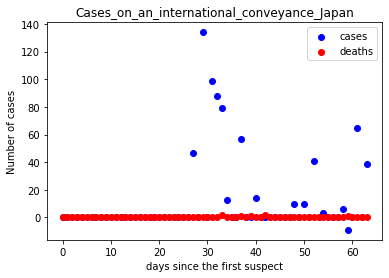

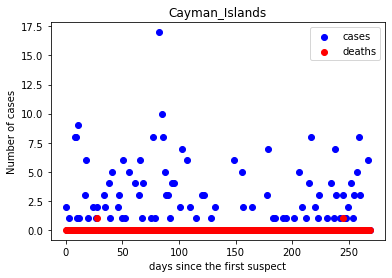

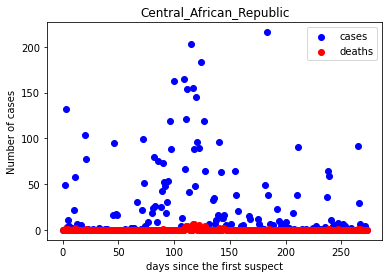

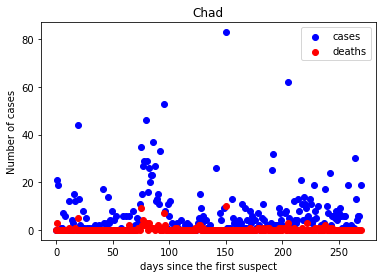

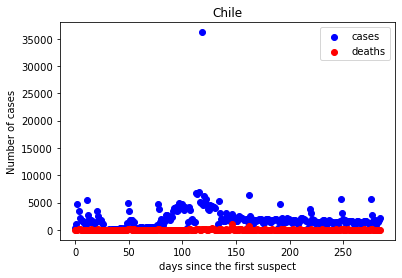

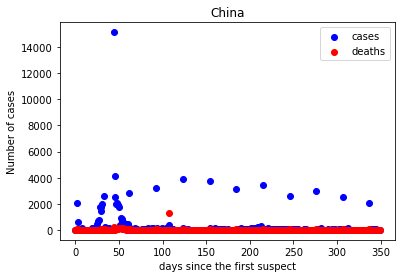

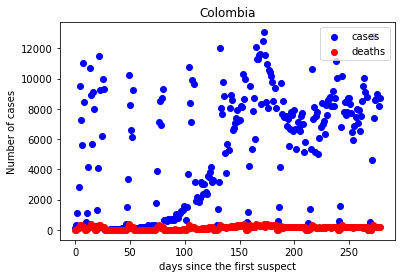

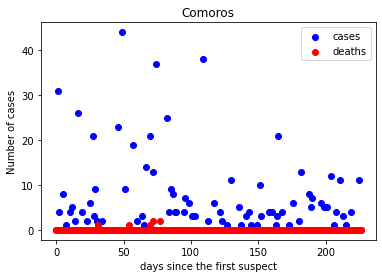

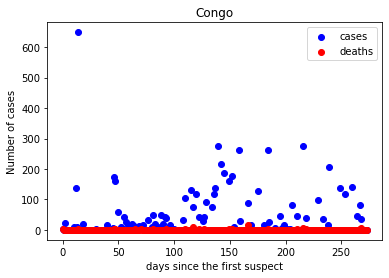

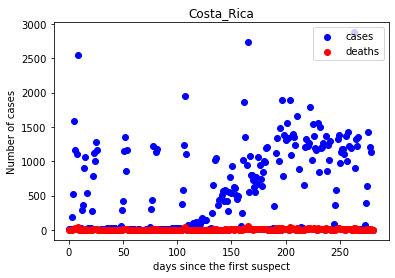

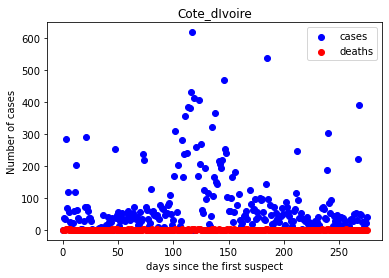

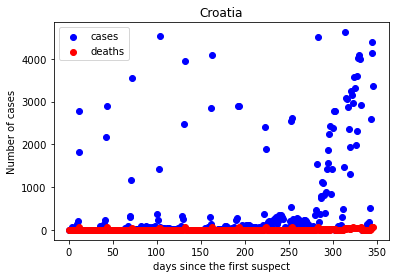

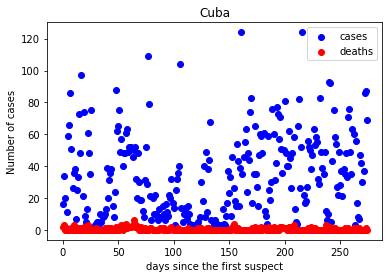

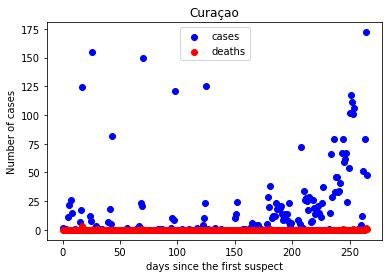

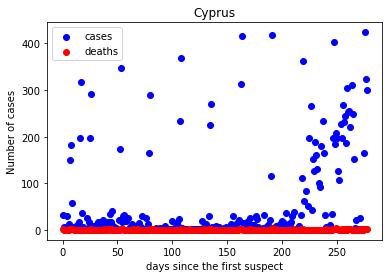

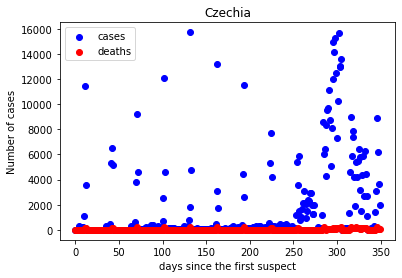

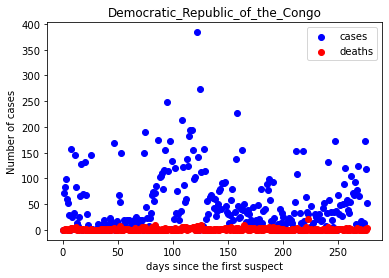

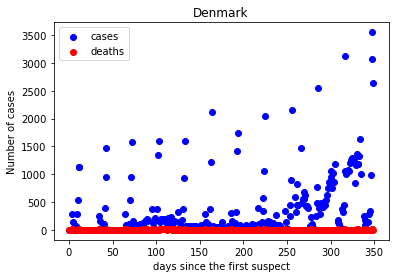

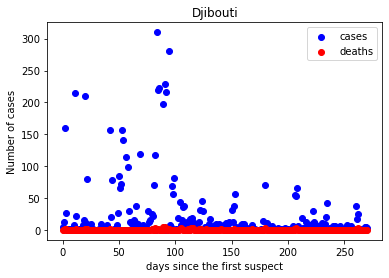

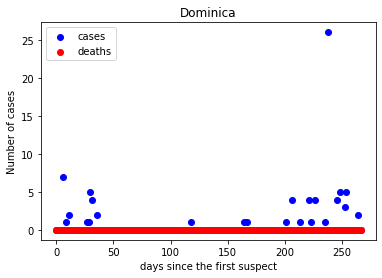

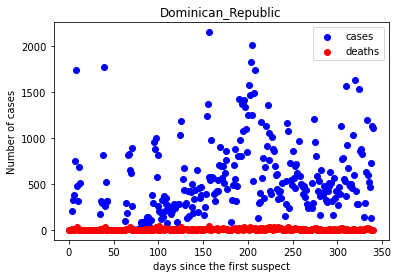

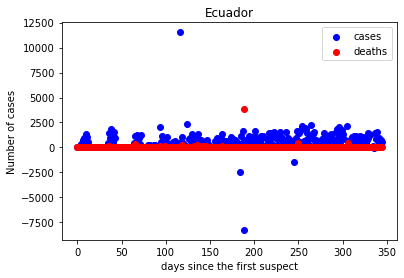

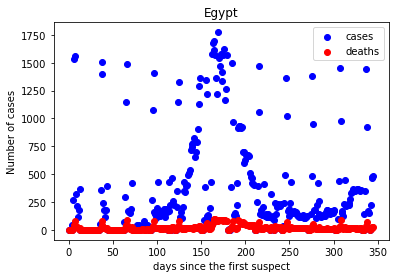

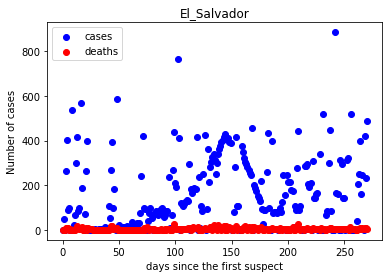

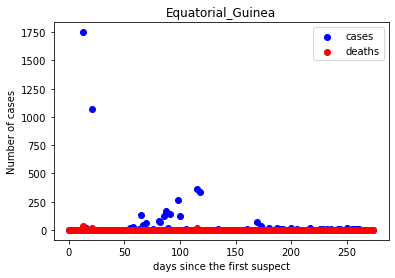

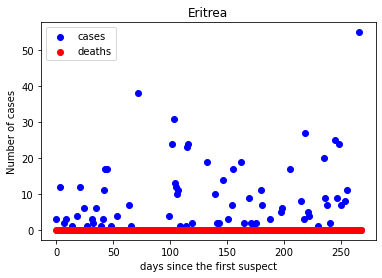

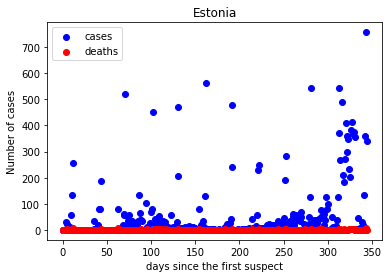

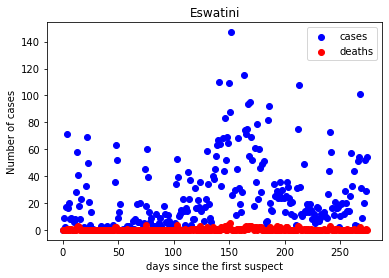

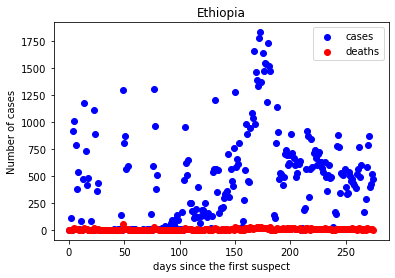

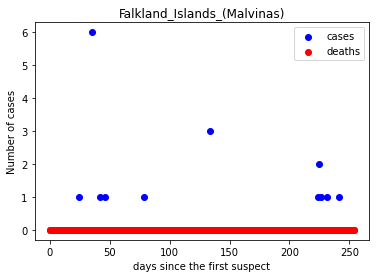

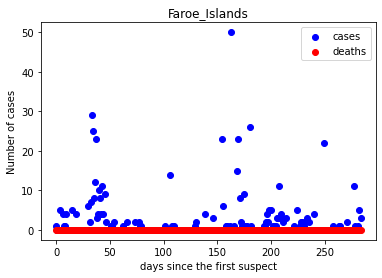

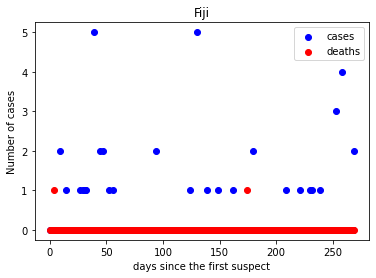

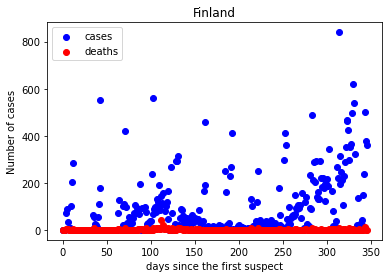

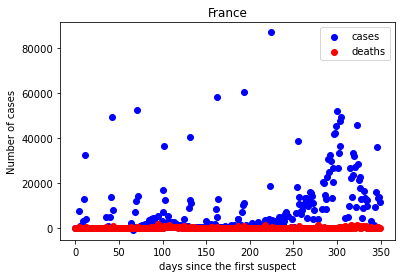

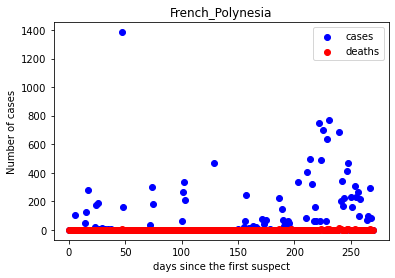

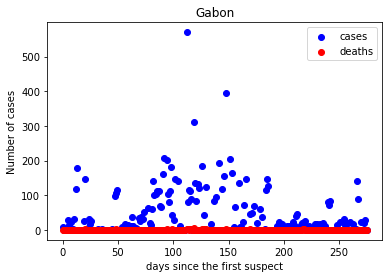

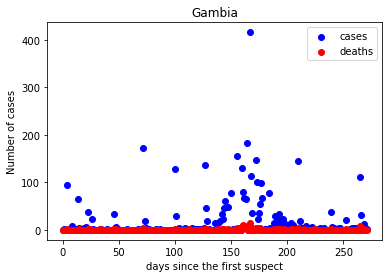

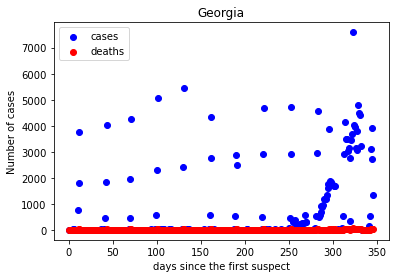

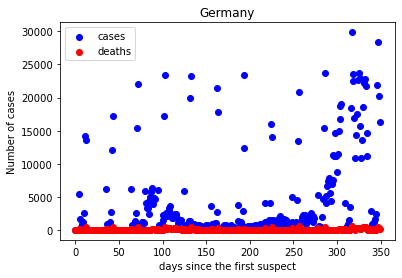

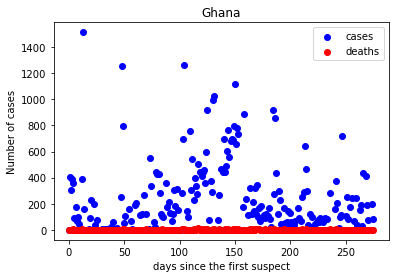

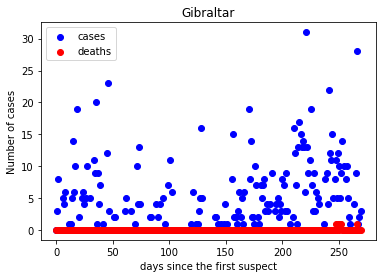

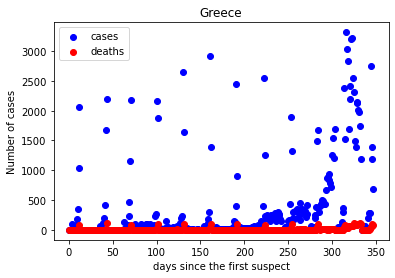

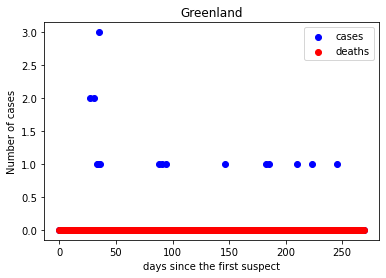

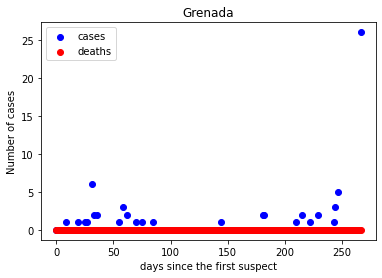

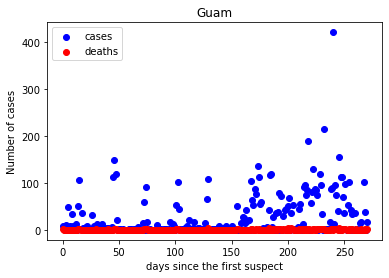

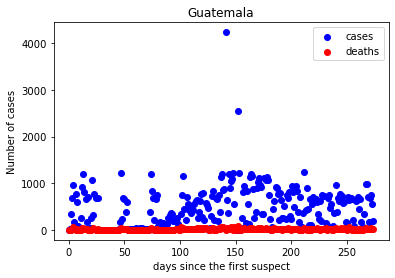

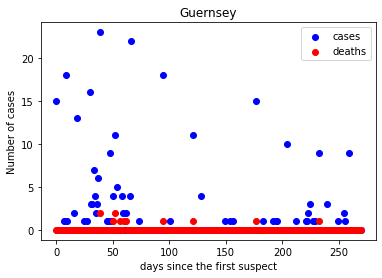

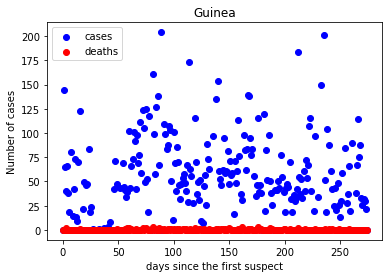

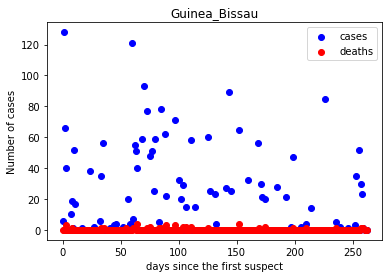

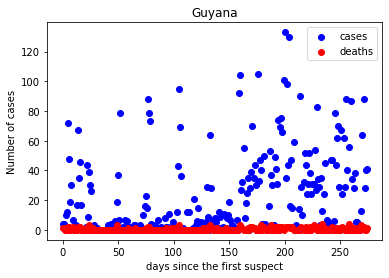

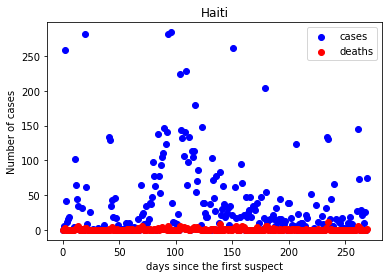

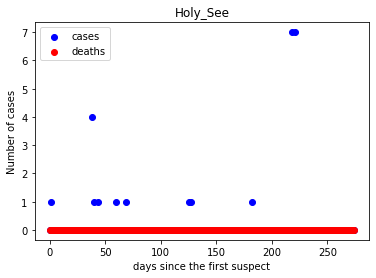

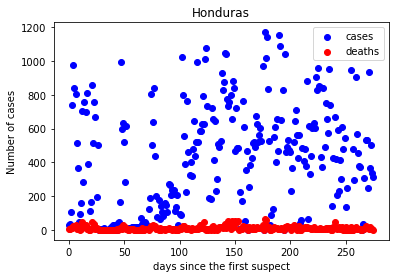

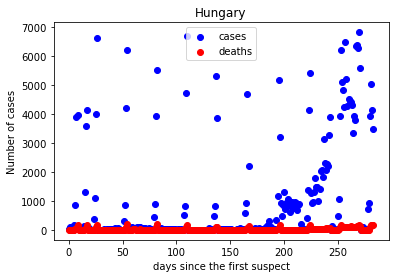

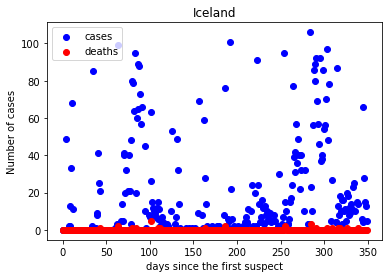

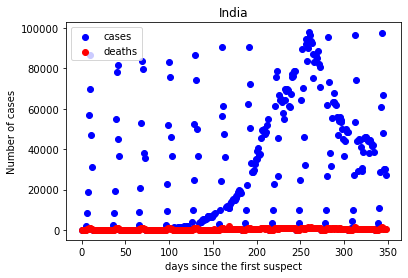

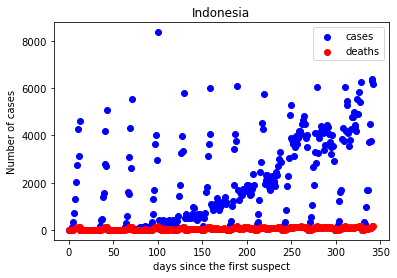

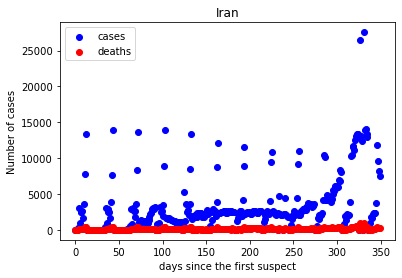

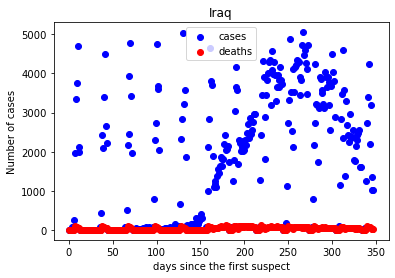

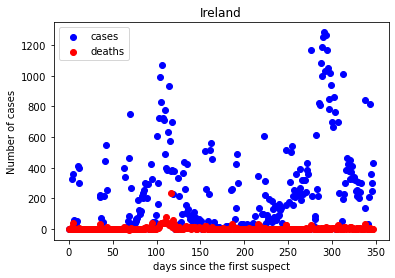

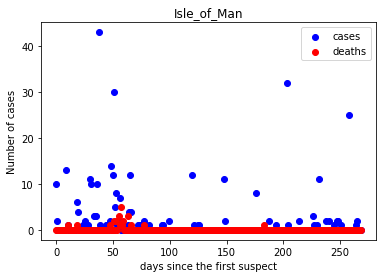

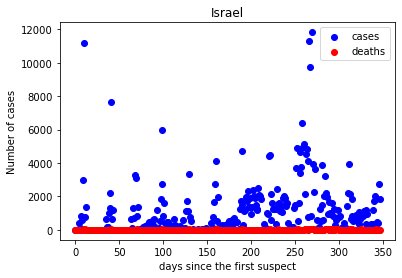

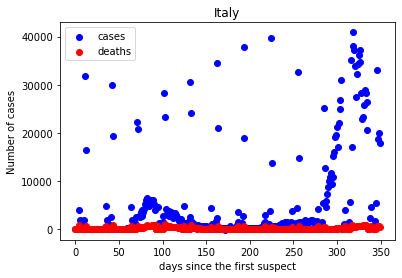

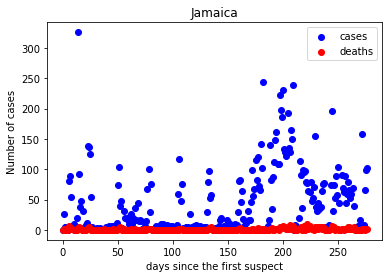

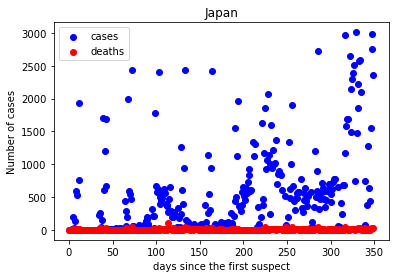

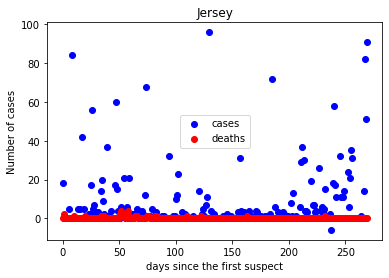

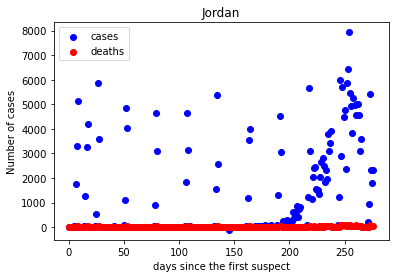

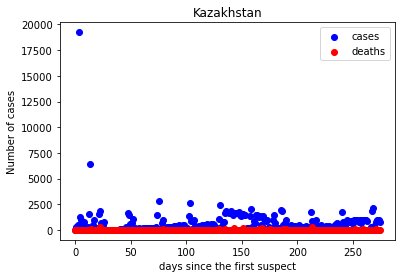

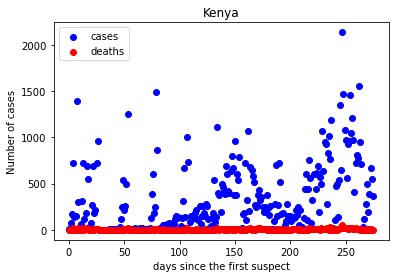

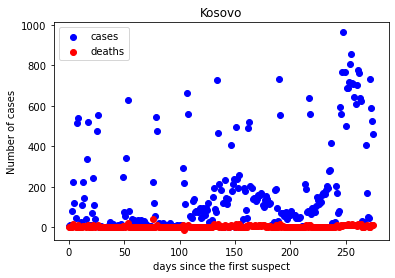

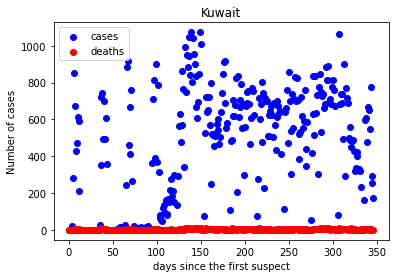

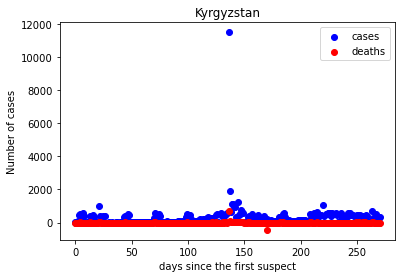

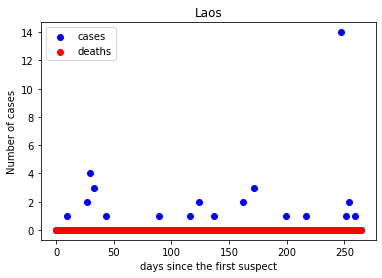

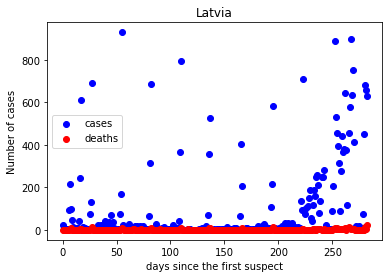

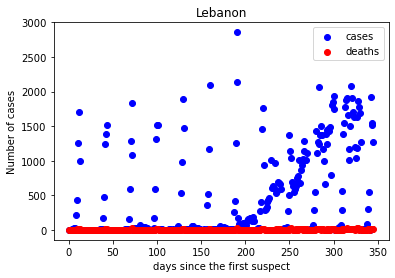

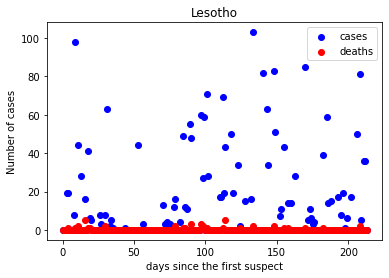

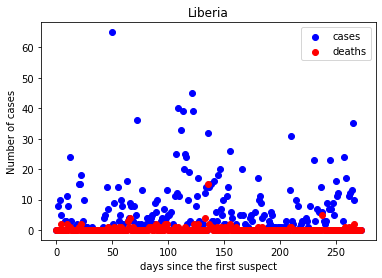

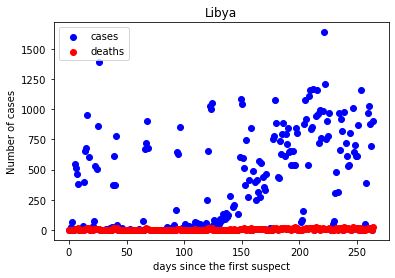

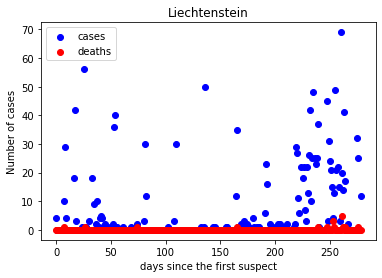

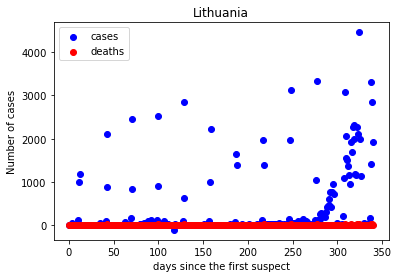

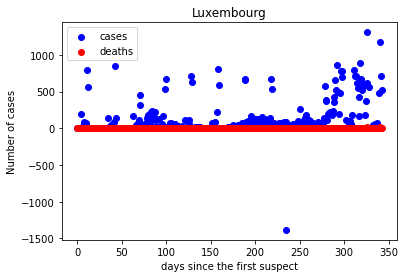

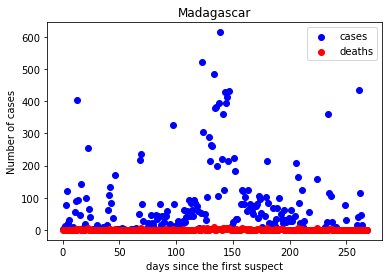

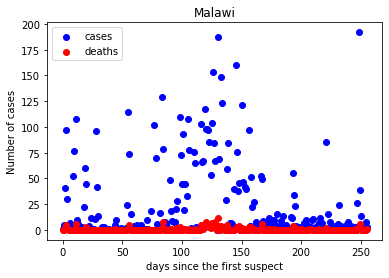

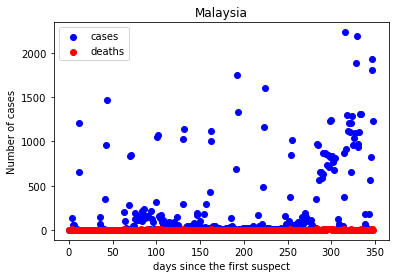

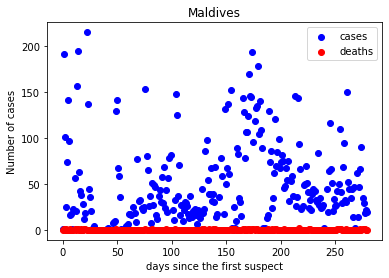

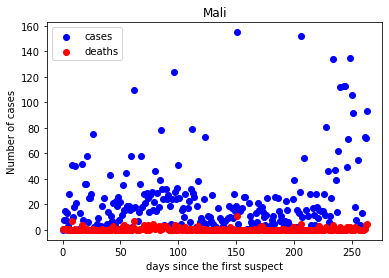

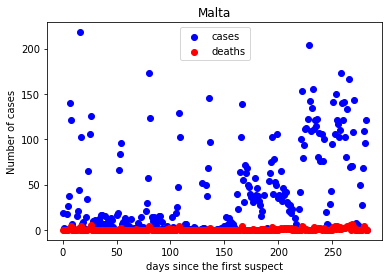

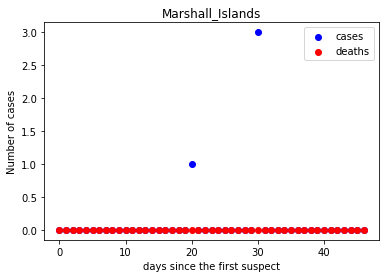

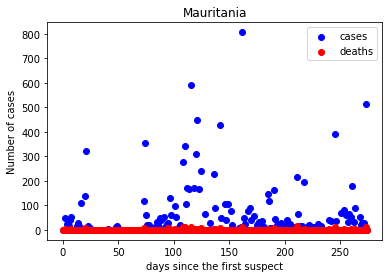

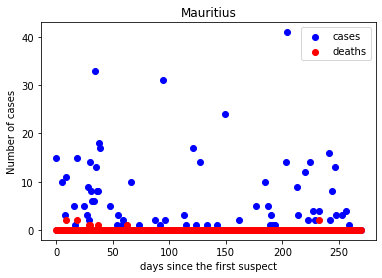

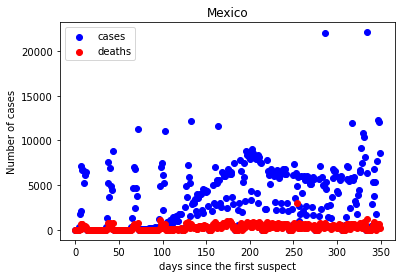

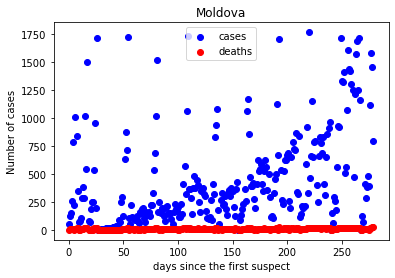

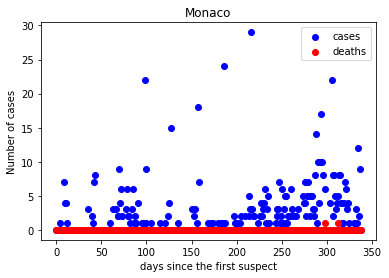

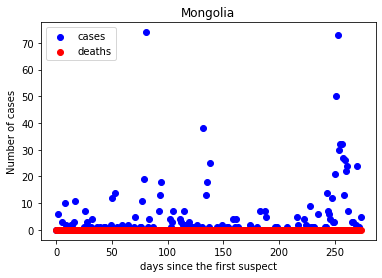

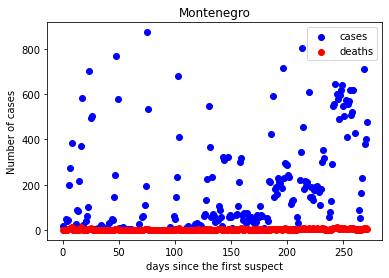

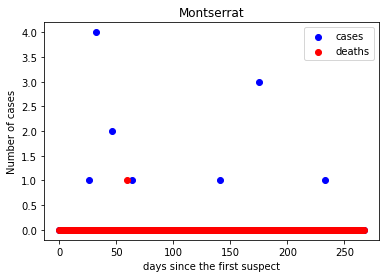

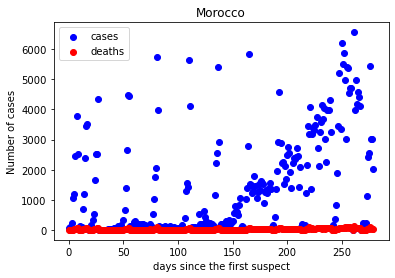

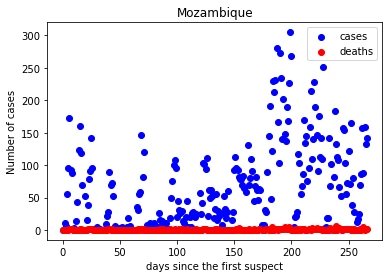

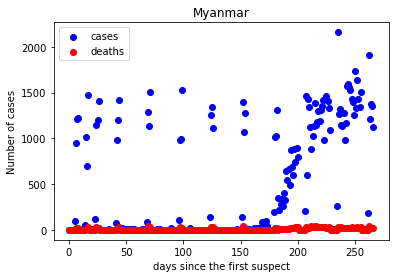

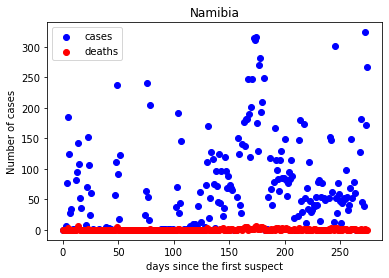

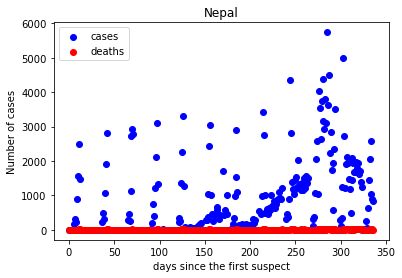

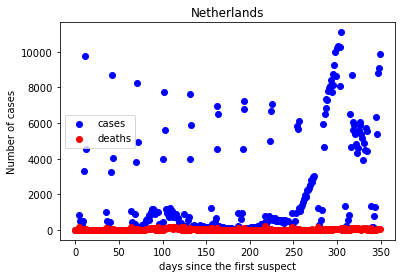

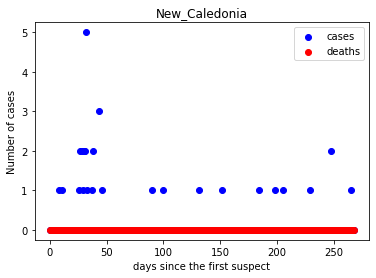

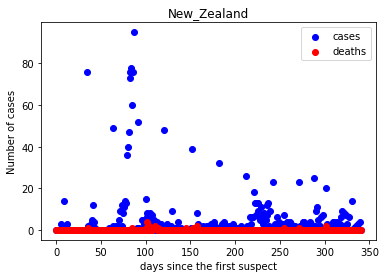

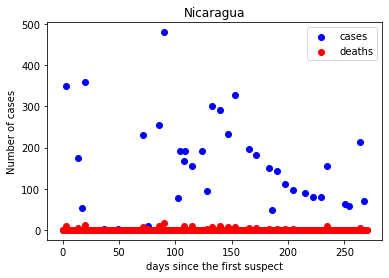

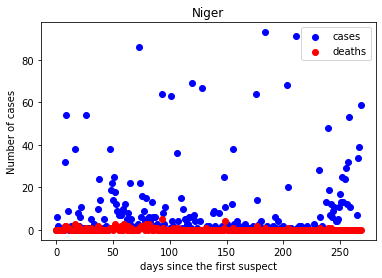

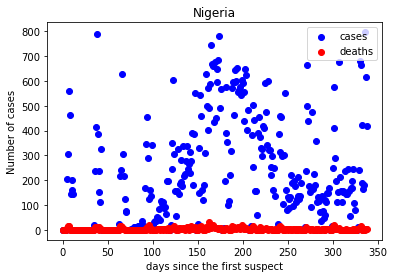

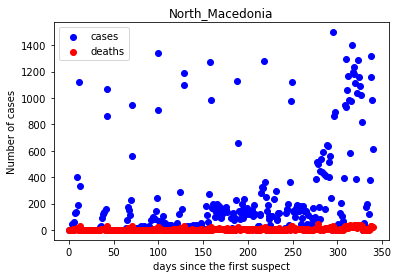

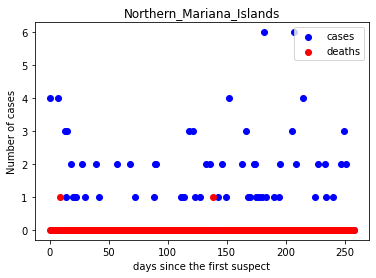

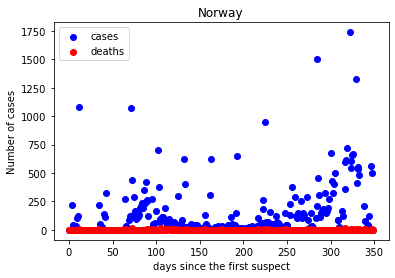

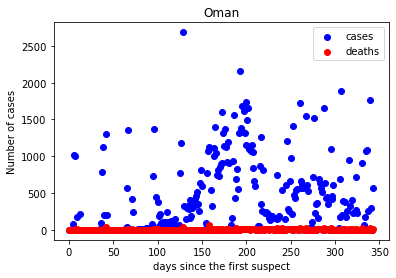

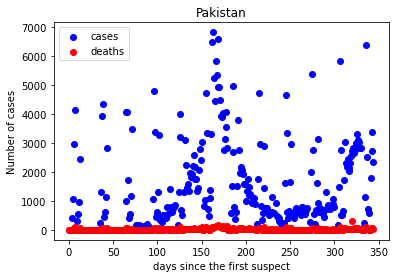

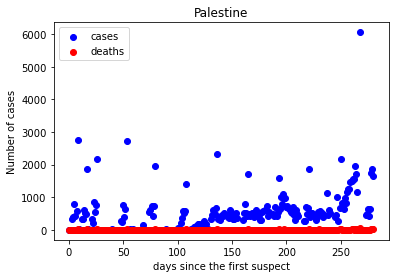

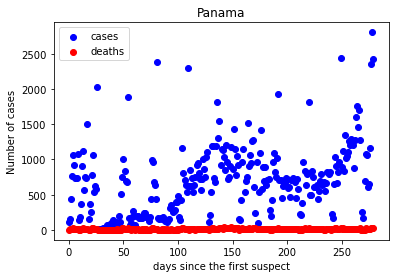

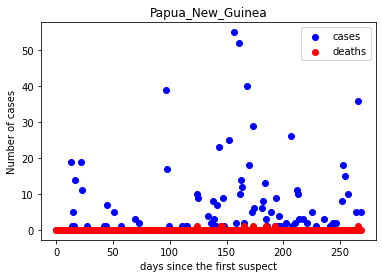

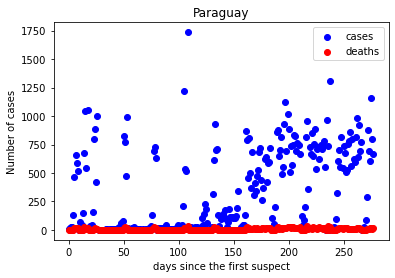

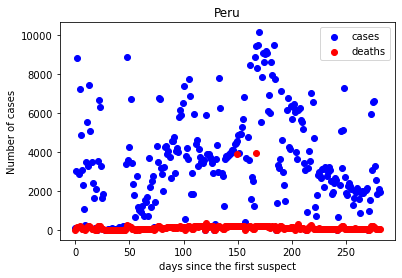

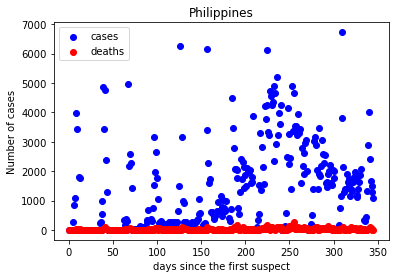

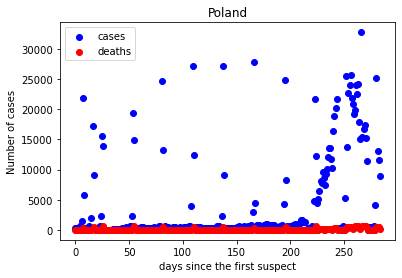

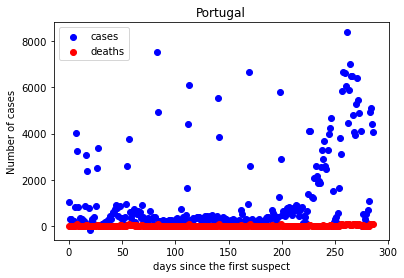

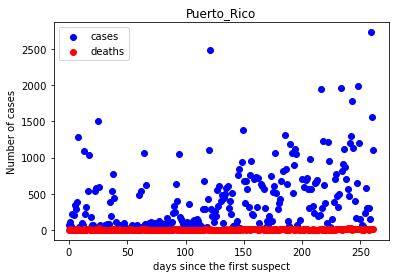

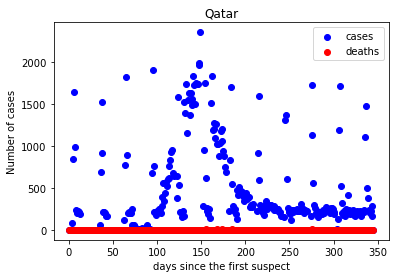

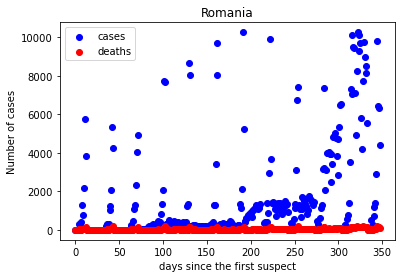

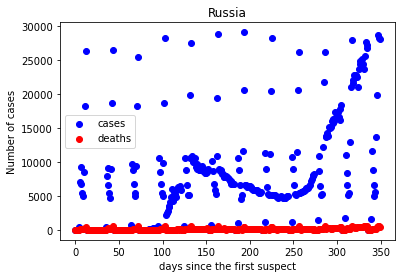

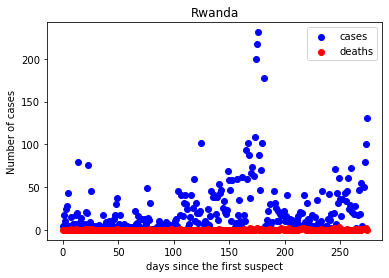

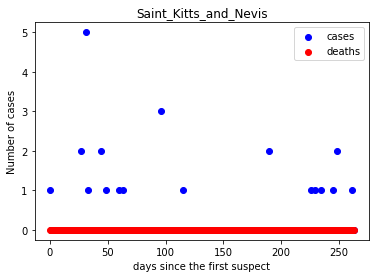

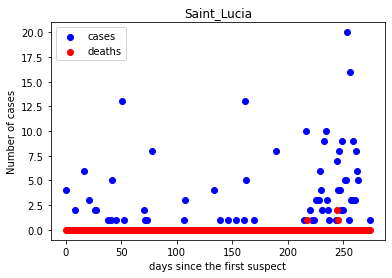

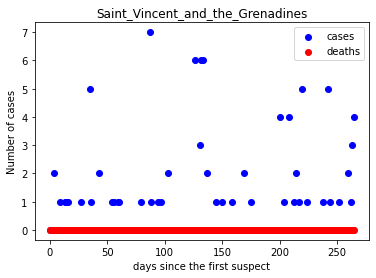

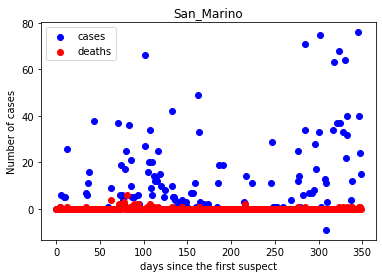

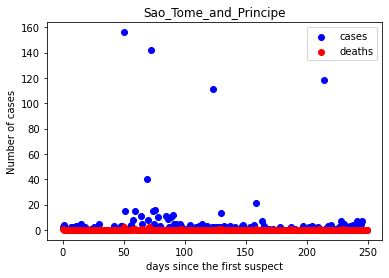

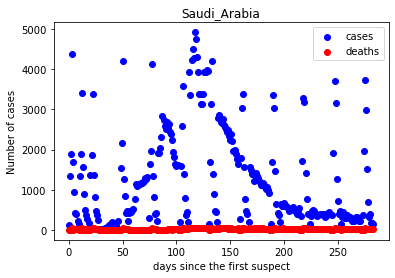

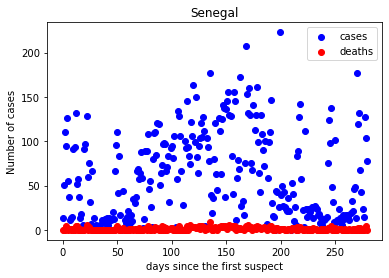

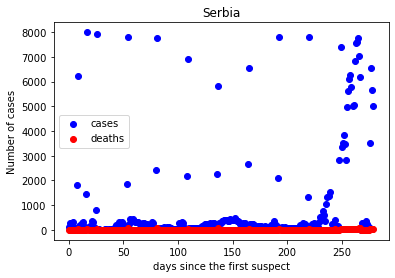

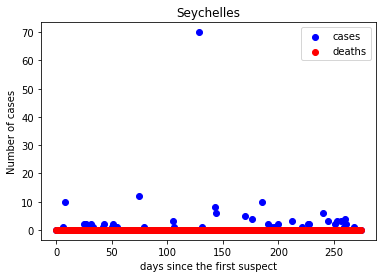

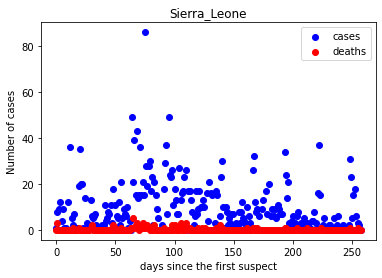

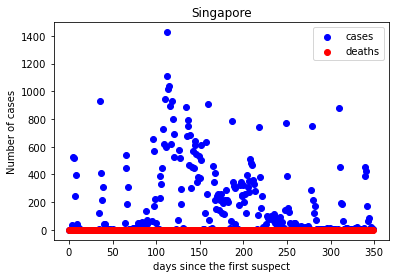

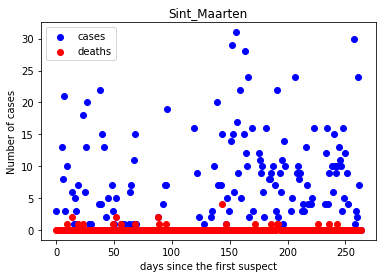

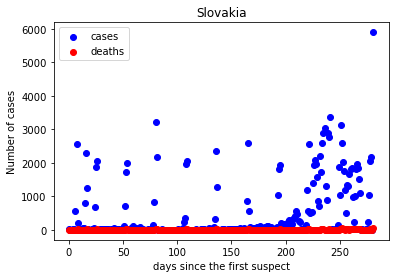

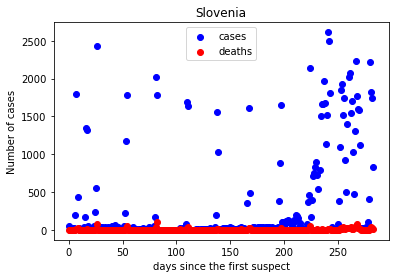

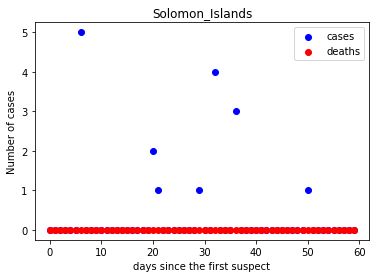

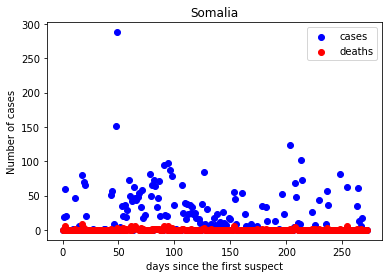

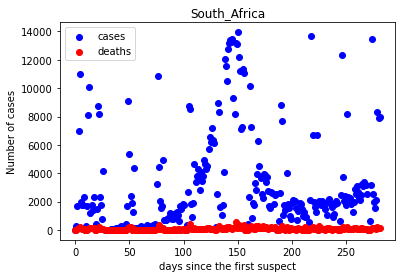

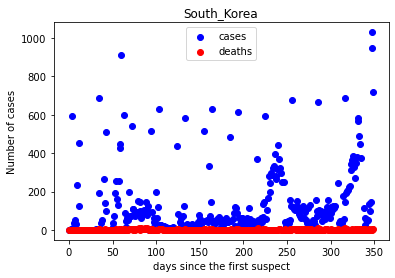

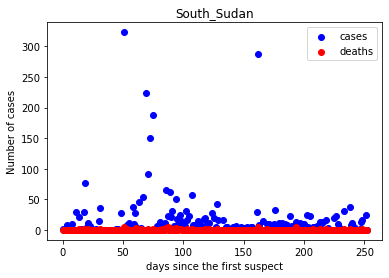

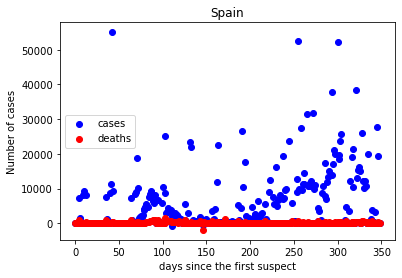

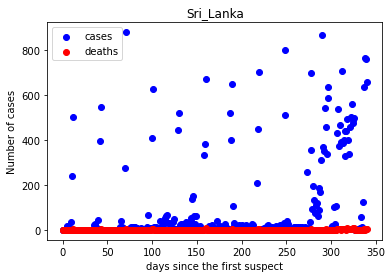

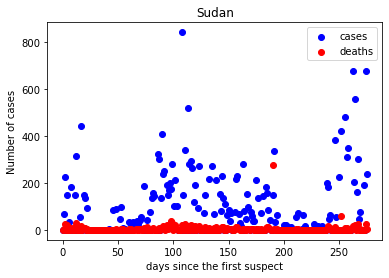

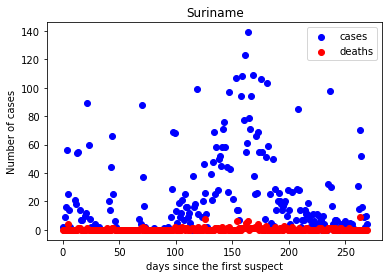

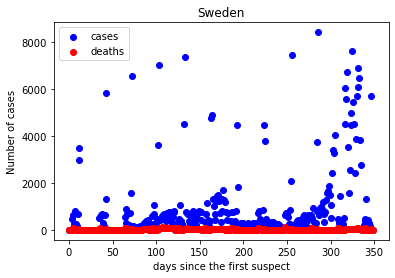

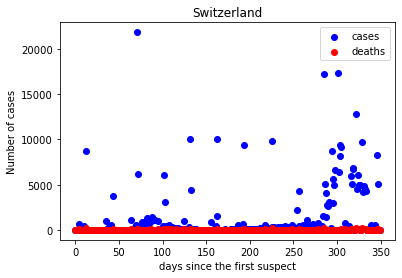

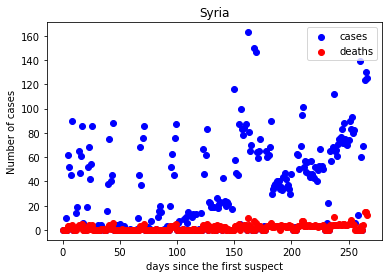

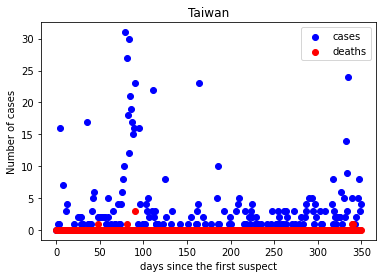

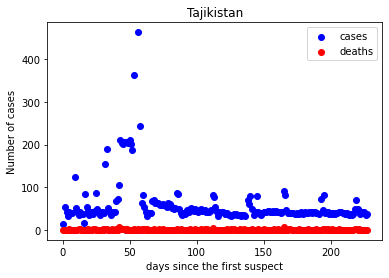

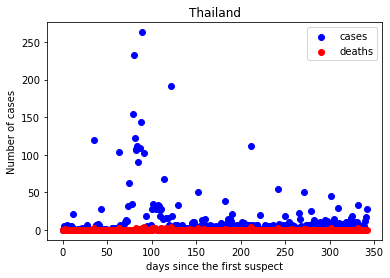

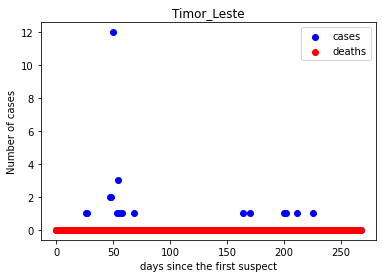

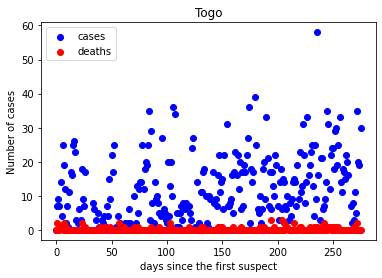

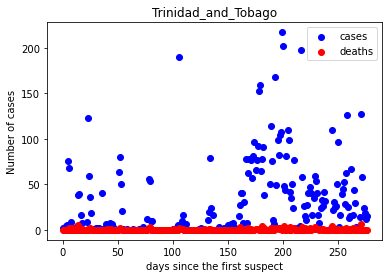

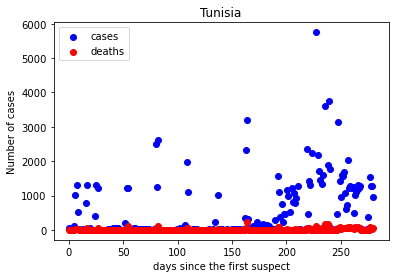

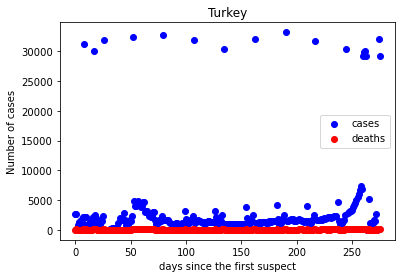

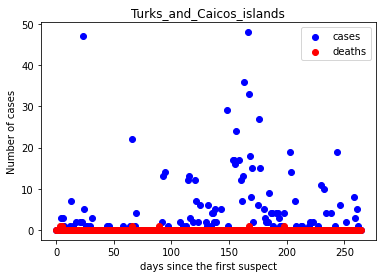

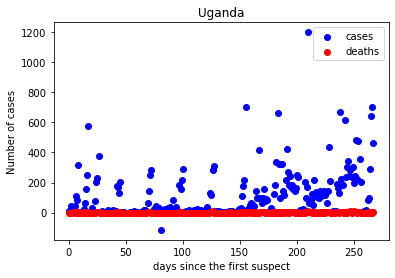

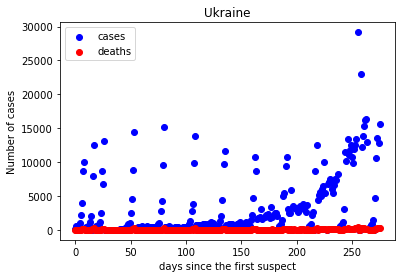

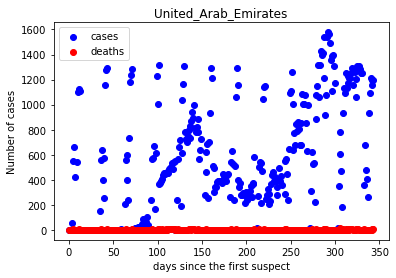

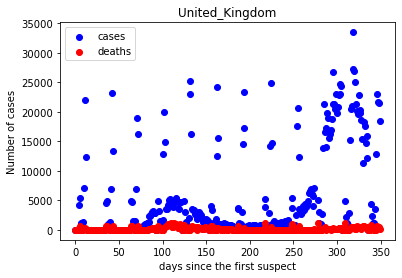

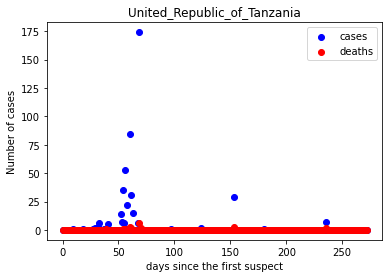

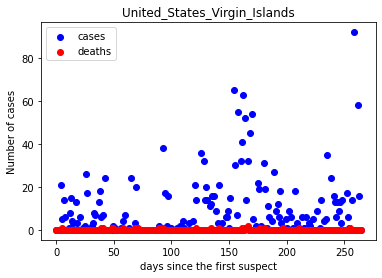

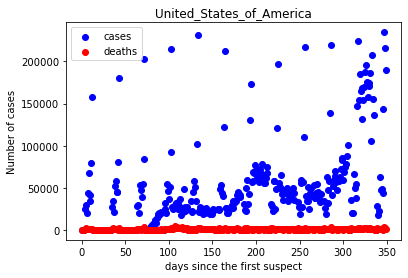

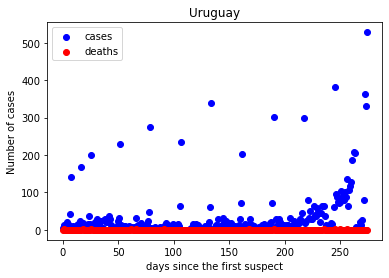

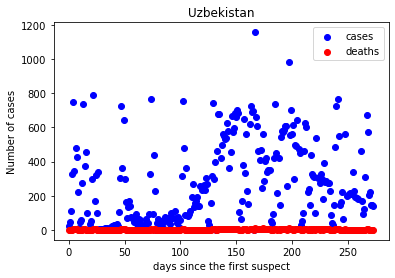

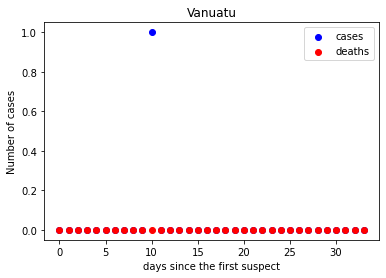

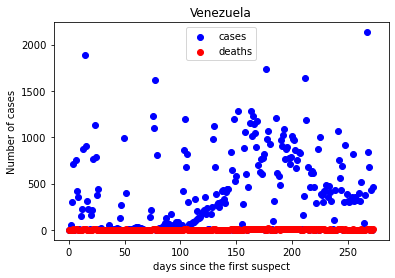

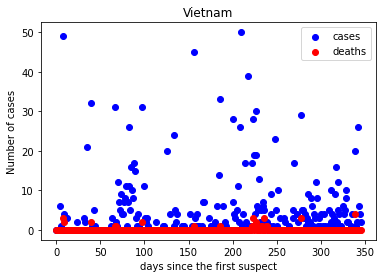

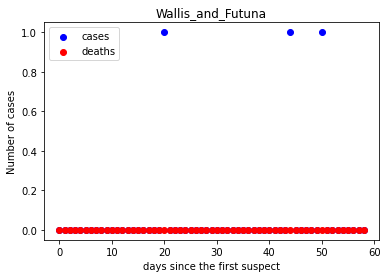

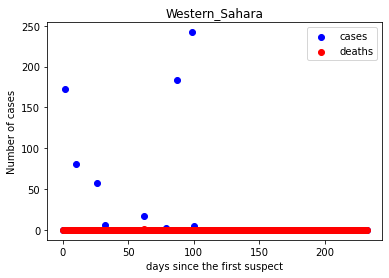

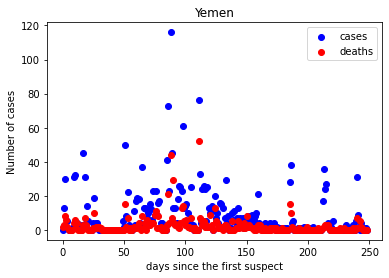

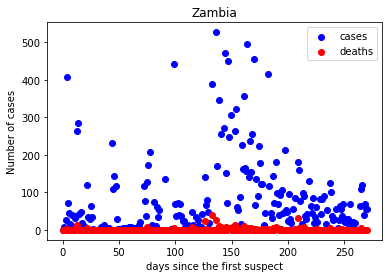

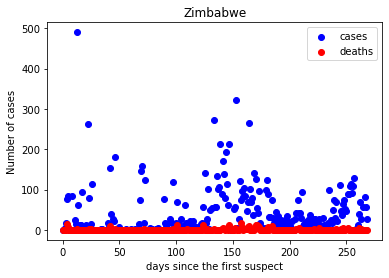

In [16]:
for idx in range(0,len(countries)):
    c = df2[df2['country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['cases'],color='blue',label='cases')
    plt.scatter(np.arange(0,len(c)),c['deaths'],color='red',label='deaths')
    plt.title(countries[idx])
    plt.xlabel('days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [18]:
df3 = df.groupby(['dateRep'])[['country','dateRep','cases','deaths']].sum().reset_index()

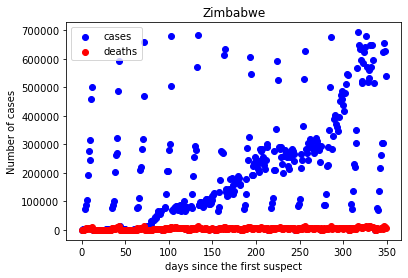

In [19]:
c=df3
plt.scatter(np.arange(0,len(c)),c['cases'],color='blue',label='cases')
plt.scatter(np.arange(0,len(c)),c['deaths'],color='red',label='deaths')
plt.title(countries[idx])
plt.xlabel('days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()